# Exercise 1 - Gauss-Seidel for Poisson Solver


### Task 1.1: 
Develop the Gauss-Seidel solver with Python List, array, or NumPy. Plot the performance varying the grid size.

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0315 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.1334 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 0.9349 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 3.8581 seconds
Running Gauss-Seidel for grid size 200x200...
Grid size 200x200 took 15.8824 seconds


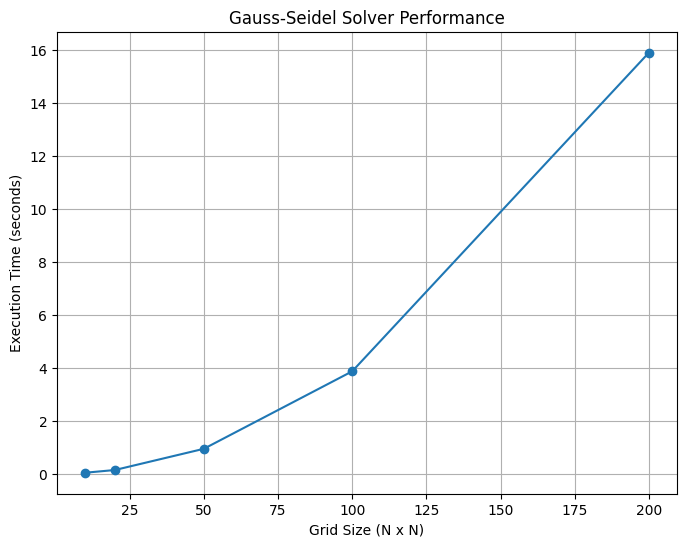

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

def gauss_seidel(f, num_iterations=1000):
    """
    Perform Gauss-Seidel iterations to solve the 2D Poisson equation.

    Parameters:
    - f: 2D NumPy array representing the grid.
    - num_iterations: Number of iterations to perform.

    Returns:
    - Updated 2D array after Gauss-Seidel iterations.
    """
    newf = f.copy()
    n, m = newf.shape

    for _ in range(num_iterations):
        for i in range(1, n-1):
            for j in range(1, m-1):
                newf[i, j] = 0.25 * (newf[i, j+1] + newf[i, j-1] +
                                     newf[i+1, j] + newf[i-1, j])
    return newf

def run_performance_test(grid_sizes, num_iterations=1000):
    """
    Run the Gauss-Seidel solver for different grid sizes and measure execution time.

    Parameters:
    - grid_sizes: List of grid sizes to test.
    - num_iterations: Number of iterations for Gauss-Seidel method.

    Returns:
    - Dictionary mapping grid size to execution time.
    """
    performance = {}

    for N in grid_sizes:
        print(f"Running Gauss-Seidel for grid size {N}x{N}...")
        f = np.random.rand(N, N)  # Initialize grid with random numbers
        f[0, :], f[-1, :], f[:, 0], f[:, -1] = 0, 0, 0, 0  # Set boundary conditions

        start_time = time.time()
        gauss_seidel(f, num_iterations)
        elapsed_time = time.time() - start_time

        performance[N] = elapsed_time
        print(f"Grid size {N}x{N} took {elapsed_time:.4f} seconds")

    return performance

# Define grid sizes to test
grid_sizes = [10, 20, 50, 100, 200]

# Run performance test
performance_data = run_performance_test(grid_sizes)

# Plot performance results
plt.figure(figsize=(8, 6))
plt.plot(performance_data.keys(), performance_data.values(), marker='o', linestyle='-')
plt.xlabel("Grid Size (N x N)")
plt.ylabel("Execution Time (seconds)")
plt.title("Gauss-Seidel Solver Performance")
plt.grid()
plt.show()

### Task 1.2: 
Profile the code to identify the part of the code to optimize. You can use the tool of your choice.

In [4]:
! python -m cProfile -s cumulative main.py

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0365 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.1672 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 1.1396 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 4.7150 seconds
Running Gauss-Seidel for grid size 200x200...
Grid size 200x200 took 19.1687 seconds
         1479348 function calls (1454321 primitive calls) in 26.070 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    828/1    0.005    0.000   26.071   26.071 {built-in method builtins.exec}
        1    0.000    0.000   26.071   26.071 main.py:1(<module>)
        1    0.000    0.000   25.236   25.236 main.py:26(run_performance_test)
        5   25.227    5.045   25.228    5.046 main.py:5(gauss_seidel)
       95    0.002    0.000    1.797    0.019 __init__.py:1(<module>)
    887/4    0.003    0.000    0.828    0.207 <

gauss_seidl is the method which takes the longest to compute -> profile this in more detail 

In [5]:
! python -m cProfile -o profile.stats main.py

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0337 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.1650 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 1.1271 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 4.7666 seconds
Running Gauss-Seidel for grid size 200x200...
Grid size 200x200 took 19.2910 seconds


In [8]:
! python -m memory_profiler main.py

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0269 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.1422 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 0.9447 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 4.0539 seconds
Running Gauss-Seidel for grid size 200x200...
Grid size 200x200 took 15.9412 seconds


In [9]:
! python -m kernprof -l main.py 

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.1342 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.6845 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 4.4674 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 18.1698 seconds
Running Gauss-Seidel for grid size 200x200...
Grid size 200x200 took 74.9041 seconds
Wrote profile results to main.py.lprof
Inspect results with:
python -m line_profiler -rmt "main.py.lprof"


In [10]:
! python -m line_profiler -rmt "main.py.lprof"

Timer unit: 1e-06 s

Total time: 61.1751 s
File: main.py
Function: gauss_seidel at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           @profile 
     5                                           def gauss_seidel(f, num_iterations=1000):
     6                                               """
     7                                               Perform Gauss-Seidel iterations to solve the 2D Poisson equation.
     8                                           
     9                                               Parameters:
    10                                               - f: 2D NumPy array representing the grid.
    11                                               - num_iterations: Number of iterations to perform.
    12                                           
    13                                               Returns:
    14                                               - Updated 2D array after Gauss-Seidel it

### Task 1.3: 
Use the Cython Annotation tool to identify the parts to use Cython

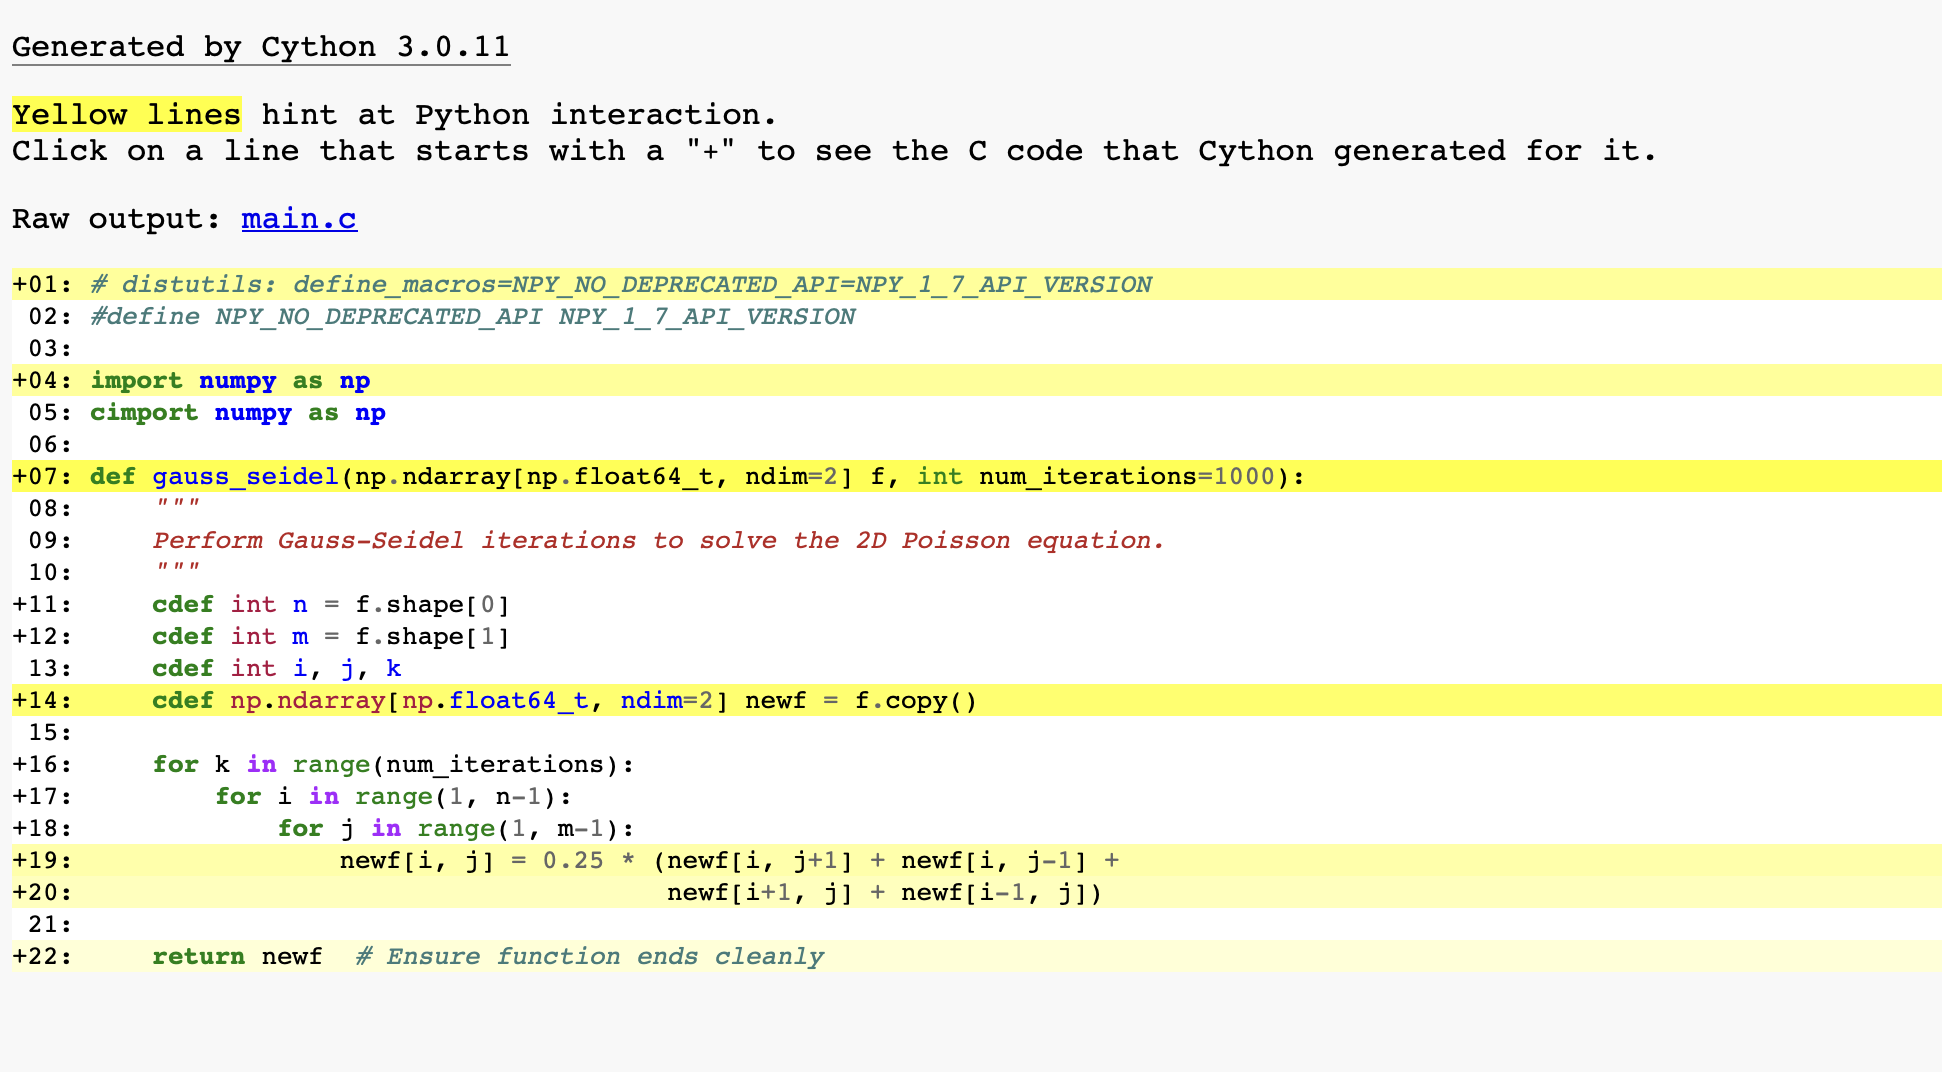

In [ ]:
! python setup.py build_ext --inplace

In [ ]:
! ls -l main.html

In [ ]:
! open main.html

# Task 1.4

Cython optimization and comparison with Task 1.1

# Task 1.5
port your code to Nvidia GPUs. Express 2 nested loop operations as NumPy roll operations

# Task 1.6 
use CuPy to port code to Nvidia GPUs

# Task 1.7
Measure performance with GPU and make a plot of the execution time verying the size of the grid. Compare and comment on the performance differences

# Task 1.8 
Save the newgrid matrix as an hdf5 file using h5py

# Bonus Exercise - Fast Fractal Fun with Cython and GPUs